<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_%EC%86%90%EA%B8%80%EC%94%A8_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

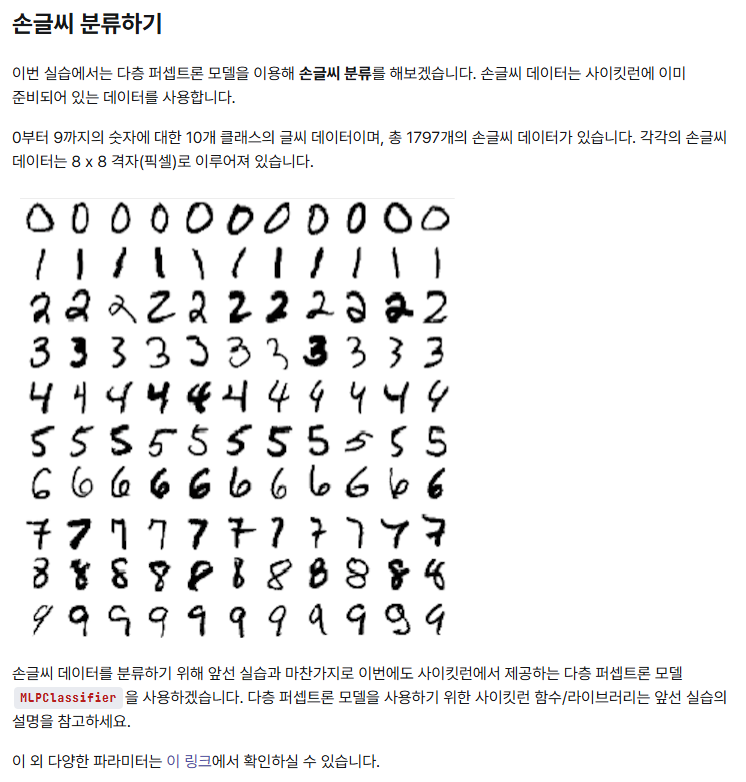

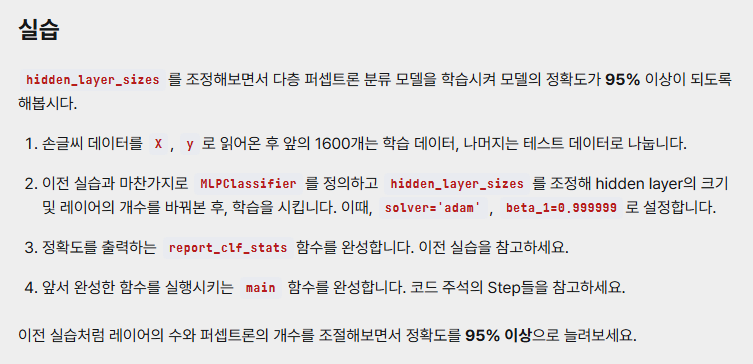

In [ ]:
import sys
import warnings

import numpy as np
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings(action="ignore")
np.random.seed(100)


def load_data(X, y):
    """1. 손글씨 데이터를 X, y로 읽어온 후
    학습 데이터, 테스트 데이터로 나눕니다.

    Step01. 학습 데이터는 앞의 1600개를 사용하고,
            테스트 데이터는 학습 데이터를 제외한 나머지를 사용합니다.
            X, y 데이터의 타입은 NumPy array라는 것을 참고하세요.
    """

    X_train = np.array(X[:1600])
    Y_train = np.array(y[:1600])

    X_test = np.array(X[1600:])
    Y_test = np.array(y[1600:])

    return X_train, Y_train, X_test, Y_test


def train_MLP_classifier(X, y):
    """2. MLPClassifier를 정의하고 hidden_layer_sizes를
    조정해 hidden layer의 크기 및 레이어의 개수를
    바꿔본 후, 학습을 시킵니다.
    """

    clf = MLPClassifier(hidden_layer_sizes=(50,50), solver='adam', beta_1=0.999999)

    clf.fit(X, y)

    return clf


def report_clf_stats(clf, X, y):
    """3. 정확도를 출력하는 함수를 완성합니다.
    이전 실습에서 작성한 "score"를 그대로
    사용할 수 있습니다.
    """

    hit = 0
    miss = 0

    for x, y_ in zip(X, y):
        if clf.predict([x])[0] == y_:
            hit += 1
        else:
            miss += 1

    score = hit / len(X) * 100

    print(f"Accuracy: {score:.1f} ({hit} hit / {miss} miss)")

    return score


def main():
    """4. main 함수를 완성합니다.

    Step01. 훈련용 데이터와 테스트용 데이터를
            앞에서 완성한 함수를 이용해 불러옵니다.

    Step02. 앞에서 학습시킨 다층 퍼셉트론 분류
            모델을 "clf"로 정의합니다.

    Step03. 앞에서 완성한 정확도 출력 함수를
            "score"로 정의합니다.
    """

    digits = load_digits()

    X = digits.data
    y = digits.target

    X_train, Y_train, X_test, Y_test = load_data(X, y)

    clf = train_MLP_classifier(X_train, Y_train)

    score = report_clf_stats(clf, X_test, Y_test)

    return 0


if __name__ == "__main__":
    sys.exit(main())


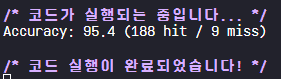